Simple image & box viewer

In [1]:
%matplotlib inline
#from pycocotools.coco import COCO

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

plt.rcParams['figure.figsize'] = (20,10)


In [2]:
img_file = "/home/ycm/tsr_dataset_tools/tsr_tv/project_0/task_0/images/valid/000001.png"

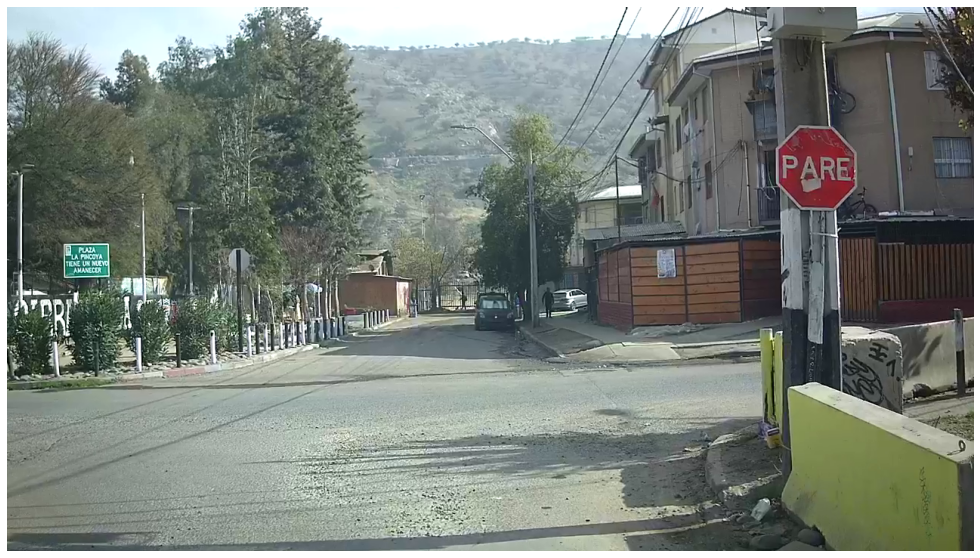

In [3]:
I = io.imread(img_file)
plt.imshow(I); plt.axis('off')
plt.show()

In [4]:
#bbox = [0.209247, 0.793989, 0.376051, 0.879246]
bbox = [0.218238, 0.792449, 0.380542, 0.882129]
def ratio_to_wh(bb, w=1280, h=720):
    #bbox_res = [bb[0]*w, bb[1]*h, bb[2]*w, bb[3]*h]
    bbox_res = [bb[1]*w, bb[0]*h, bb[3]*w, bb[2]*h]
    return bbox_res

def ratio_to_hw(bb, w=1280, h=720):
    #bbox_res = [bb[0]*h, bb[1]*w, bb[2]*h, bb[3]*w]
    bbox_res = [bb[1]*h, bb[0]*w, bb[3]*h, bb[2]*w]
    return bbox_res

def ratio_to_whdd(bb, w=1280, h=720):
    #bbox_res = [bb[0]*w, bb[1]*h, bb[2]*w, bb[3]*h]
    bbox_res = [bb[1]*w, bb[0]*h, bb[3]*w - bb[1]*w, bb[2]*h - bb[0]*h]
    return bbox_res

bbox = ratio_to_whdd(bbox)
bbox

[1014.33472, 157.13136, 114.7904000000002, 116.85887999999997]

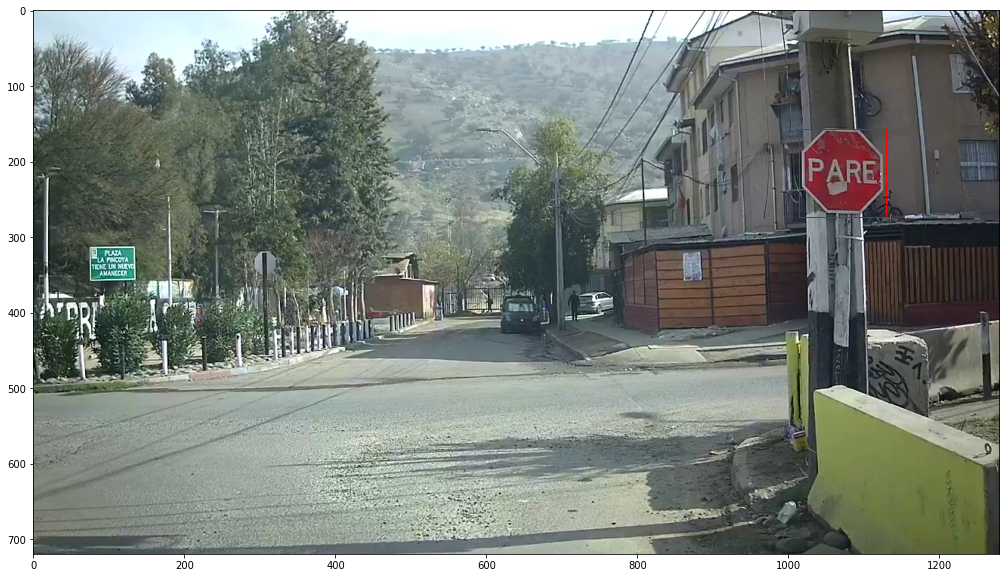

In [5]:
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')

I = io.imread(img_file)
fig, ax = plt.subplots()
ax.imshow(I);
ax.add_patch(rect)

plt.show()

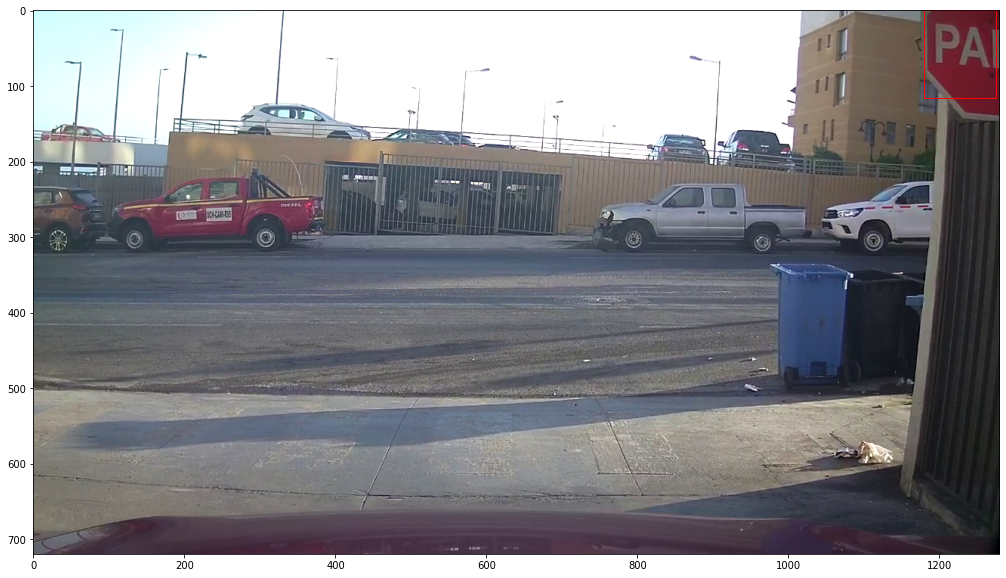

In [9]:
img_file = "/home/ycm/tsr_dataset_tools/tsr_tv/project_0/task_0/images/valid/000748.png"
bbox = [-0.000768, 0.921098, 0.160453, 0.995581]

bbox = ratio_to_whdd(bbox)
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
I = io.imread(img_file)
fig, ax = plt.subplots()
ax.imshow(I);
ax.add_patch(rect)
plt.show()

In [21]:
bbox = [0,0,0,0]
text = widgets.Text(
    value='0,0,0,0',
    description='bbox',
    continuous_update=True, )
out = widgets.Output()

def callback(wdgt):
    clear_output()
    display(text)
    display(wdgt.value)
    bbox_str = wdgt.value.strip().split(',')
    bbox = [ float(b.strip()) for b in bbox_str]
text.on_submit(callback)
display(text)

#total_box = widgets.VBox([text_box, button_hw, slide_box, text_box, out])
#display(total_box)


Text(value='0,0,0,1', description='bbox')

'0,0,0,1'

In [23]:
bbox

[0, 0, 0, 0]

In [ ]:
button_hw = widgets.Button(description='hwhw')
button_wh = widgets.Button(description='whwh')
button_hwdd = widgets.Button(description='hwdd')
button_ratio_hw = widgets.Button(description='ratio_hw')
button_ratio_hwdd = widgets.Button(description='ratio_hwdd')

def (_):
    with out:
button_hw.on_click(img_next)

In [28]:
button_prev = widgets.Button(description='Prev Images')
button_next = widgets.Button(description='Next Images')
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(imgIds)-1,
    continuous_update=False,
    step=1,)
text = widgets.Text(
    value='0',
    description='img number',
    continuous_update=False, )
out = widgets.Output()
img_k = 0

def img_prev(_):
    with out:
        clear_output()
        I = io.imread(img_file)
        plt.imshow(I); plt.axis('off')
        plt.show()
        
def img_next(_):
    with out:
        clear_output()
        global img_k
        img_k += 1
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()

def img_slide(_):
    with out:
        clear_output()
        global img_k
        img_k = slider.value
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()

def img_num(_):
    with out:
        clear_output()
        #global img_k
        img_k = int(text.value)
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()
        dir(self)
        
# linking button and function together using a button's method
button_prev.on_click(img_prev)
button_next.on_click(img_next)
slider.observe(img_slide)
text.observe(img_num)

# make interactive boxes
button_box = widgets.HBox([button_prev,button_next])
slide_box = widgets.HBox([slider])
text_box = widgets.HBox([text])
total_box = widgets.VBox([button_box, slide_box, text_box, out])
display(total_box)

In [15]:
from pathlib import Path
tsr_ex_dir ='./tsr_ex/project_0/task_0'
tsr_dir ='./tsr/project_0/task_0'
Kaggle_dir = './results/Kaggle2/'
las_dir ='./results/Lasvegas Taxi/'

dataDir=tsr_ex_dir
#dataDir=tsr_dir
annFile='{}/annotations/instances_default.json'.format(dataDir)

In [16]:
# initialize COCO api for instance annotations
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
names=[cat['name'] for cat in cats]
print('COCO categories names: \n{}\n'.format(', '.join(names)))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
COCO categories names: 
Stop sign - Oct



In [17]:
# Select label & image
#catIds = coco.getCatIds(catNms=['Stop sign - Oct']); 
#_catNms = names[:1]
_catNms = ['Stop sign - Oct']
catIds = coco.getCatIds(catNms=_catNms);
imgIds = coco.getImgIds(catIds=catIds);
print("the number of images :",len(imgIds))
print("images index = [%d-%d]"%(min(imgIds), max(imgIds)))
imgIds.sort()
imgIds

the number of images : 881
images index = [0-880]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [28]:
button_prev = widgets.Button(description='Prev Images')
button_next = widgets.Button(description='Next Images')
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(imgIds)-1,
    continuous_update=False,
    step=1,)
text = widgets.Text(
    value='0',
    description='img number',
    continuous_update=False, )
out = widgets.Output()
img_k = 0

def img_prev(_):
    with out:
        clear_output()
        global img_k
        img_k -= 1
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()
        
def img_next(_):
    with out:
        clear_output()
        global img_k
        img_k += 1
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()

def img_slide(_):
    with out:
        clear_output()
        global img_k
        img_k = slider.value
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()

def img_num(_):
    with out:
        clear_output()
        #global img_k
        img_k = int(text.value)
        img = coco.loadImgs(imgIds[img_k])[0]
        I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
        _annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(_annIds)
        print("annos: ",anns)
        plt.imshow(I); plt.axis('off')
        coco.showAnns(anns, draw_bbox=True)
        plt.show()
        dir(self)
        
# linking button and function together using a button's method
button_prev.on_click(img_prev)
button_next.on_click(img_next)
slider.observe(img_slide)
text.observe(img_num)

# make interactive boxes
button_box = widgets.HBox([button_prev,button_next])
slide_box = widgets.HBox([slider])
text_box = widgets.HBox([text])
total_box = widgets.VBox([button_box, slide_box, text_box, out])
display(total_box)

img:  {'id': 0, 'width': 1360, 'height': 800, 'license': 0, 'file_name': 'project_0/task_0/images/kaggle2-ts1_9.jpg', 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
annos:  [{'id': 0, 'image_id': 0, 'category_id': 1, 'segmentation': [], 'area': 1089.0, 'bbox': [290.0, 389.0, 33.0, 33.0], 'iscrowd': 0, 'attributes': {'Color': 'Red', 'occluded': False}}, {'id': 1, 'image_id': 0, 'category_id': 1, 'segmentation': [], 'area': 1024.0, 'bbox': [822.0, 361.0, 32.0, 32.0], 'iscrowd': 0, 'attributes': {'Color': 'Red', 'occluded': False}}]


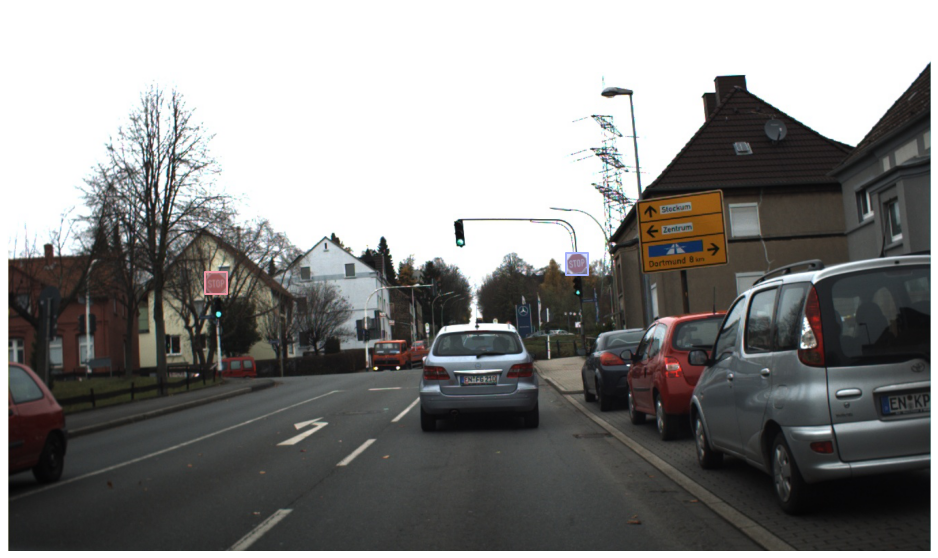

In [19]:
img = coco.loadImgs(imgIds[0])[0]

# load and display image
I = io.imread('%s/images/%s'%(dataDir,img['file_name'].split('/')[-1]))
#plt.axis('off'); plt.imshow(I); plt.show()

# load and display instance annotations
#catIds_ = coco.getCatIds(catNms=['traffic light','stop sign'])
catIds_ = catIds
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds_, iscrowd=None)
anns = coco.loadAnns(annIds)
print("img: ",img)
print("annos: ",anns)
plt.imshow(I); plt.axis('off')
coco.showAnns(anns, draw_bbox=True)

In [15]:
## The end ##